In [ ]:
%cd /content/drive/MyDrive/Deep Learning/Emotion detection System

/content/drive/MyDrive/Deep Learning/Emotion detection System


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
 99% 1.97G/1.98G [00:29<00:00, 83.8MB/s]
100% 1.98G/1.98G [00:29<00:00, 72.9MB/s]


In [ ]:
import zipfile
zip_reg = zipfile.ZipFile('emotion-recognition-dataset.zip','r')
zip_reg.extractall('/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset')
zip_reg.close()


In [ ]:
!rm -rf "/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/dataset/Ahegao"

In [ ]:
import os
import shutil
import random

# Define the path to the original dataset and the new dataset
original_dataset_path = '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/dataset'
new_dataset_path = '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/balance_dataset'
target_images_per_class = 1200

# Create the new dataset directory if it doesn't exist
os.makedirs(new_dataset_path, exist_ok=True)

# Iterate through each class in the original dataset
for class_name in os.listdir(original_dataset_path):
    class_folder = os.path.join(original_dataset_path, class_name)

    # Only proceed if it's a directory
    if os.path.isdir(class_folder):
        # List all images in the class folder
        images = os.listdir(class_folder)

        # If there are more than the target number of images, select a random subset
        if len(images) > target_images_per_class:
            selected_images = random.sample(images, target_images_per_class)
        else:
            # Otherwise, take all available images
            selected_images = images

        # Create the class folder in the new dataset if it doesn't exist
        new_class_folder = os.path.join(new_dataset_path, class_name)
        os.makedirs(new_class_folder, exist_ok=True)

        # Copy the selected images to the new class folder
        for image in selected_images:
            source_image_path = os.path.join(class_folder, image)
            destination_image_path = os.path.join(new_class_folder, image)
            shutil.copy(source_image_path, destination_image_path)

        print(f'Processed class: {class_name} ({len(selected_images)} images)')

print('Dataset preparation complete!')


Processed class: Angry (1200 images)
Processed class: Happy (1200 images)
Processed class: Neutral (1200 images)
Processed class: Sad (1200 images)
Processed class: Surprise (1200 images)
Dataset preparation complete!


In [ ]:
import os
import shutil
import random

# Define paths
source_folder = '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/balance_dataset'  # Folder with class subfolders
train_folder = '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/train_split'  # New train folder
val_folder = '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/val_split'  # New validation folder

# Create the new train and val directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# List all class subfolders
class_folders = os.listdir(source_folder)

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(source_folder, class_folder)

    if os.path.isdir(class_path):  # Proceed only if it's a directory (class folder)

        # Create train and val directories for each class
        train_class_folder = os.path.join(train_folder, class_folder)
        val_class_folder = os.path.join(val_folder, class_folder)

        os.makedirs(train_class_folder, exist_ok=True)
        os.makedirs(val_class_folder, exist_ok=True)

        # List all images in the current class folder
        images = os.listdir(class_path)

        # Filter to include only files (ignore directories)
        images = [img for img in images if os.path.isfile(os.path.join(class_path, img))]

        # Shuffle the images to randomize the selection
        random.shuffle(images)

        # Select the first 1000 images for training, and the rest 200 for validation
        train_images = images[:840]
        val_images = images[840:]

        # Move or copy the images to the respective train and val folders
        for image in train_images:
            source_image_path = os.path.join(class_path, image)
            destination_image_path = os.path.join(train_class_folder, image)
            shutil.copy(source_image_path, destination_image_path)  # Use shutil.move() to move instead of copy

        for image in val_images:
            source_image_path = os.path.join(class_path, image)
            destination_image_path = os.path.join(val_class_folder, image)
            shutil.copy(source_image_path, destination_image_path)  # Use shutil.move() to move instead of copy

        print(f"Class '{class_folder}': Training set has {len(train_images)} images.")
        print(f"Class '{class_folder}': Validation set has {len(val_images)} images.")


Class 'Angry': Training set has 840 images.
Class 'Angry': Validation set has 360 images.
Class 'Happy': Training set has 840 images.
Class 'Happy': Validation set has 360 images.
Class 'Neutral': Training set has 840 images.
Class 'Neutral': Validation set has 360 images.
Class 'Sad': Training set has 840 images.
Class 'Sad': Validation set has 360 images.
Class 'Surprise': Training set has 840 images.
Class 'Surprise': Validation set has 360 images.


# Check no of IMage in any Folder

In [ ]:
import os

def count_images_in_folder(folder_path):
    # List of image extensions to consider
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp']

    # Initialize counter for images
    image_count = 0

    # Walk through the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file has an image extension
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1

    return image_count

# Specify the folder you want to check
folder_path = '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/aug_train_split/Surprise'
image_count = count_images_in_folder(folder_path)

print(f"There are {image_count} images in the folder '{folder_path}'.")


There are 2860 images in the folder '/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/aug_train_split/Surprise'.


In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

def augment_images(original_data_path, augmented_data_path, augmentation_count=4):
    # Clear previous augmented data if necessary
    if os.path.exists(augmented_data_path):
        shutil.rmtree(augmented_data_path)
    os.makedirs(augmented_data_path)

    # Data augmentation settings
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    # Traverse the class folders (each class contains images)
    for class_name in os.listdir(original_data_path):
        class_path = os.path.join(original_data_path, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip files, only process directories

        # Create the corresponding class folder in augmented_data_path
        save_class_path = os.path.join(augmented_data_path, class_name)
        os.makedirs(save_class_path, exist_ok=True)

        # Process each image in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
                print(f"Processing image: {image_path}")  # Debug: Print image path

                # Load the image
                try:
                    img = tf.keras.utils.load_img(image_path, target_size=(256, 256))  # Resize if needed
                    x = tf.keras.utils.img_to_array(img)
                    x = x.reshape((1,) + x.shape)  # Reshape for the generator
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")
                    continue  # Skip this image if there's an error

                # Debug: Check the shape of the image array before augmentation
                print(f"Image shape: {x.shape}")  # Debug: Check image array shape

                # Save augmented images to the corresponding subfolder
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=save_class_path, save_prefix="aug", save_format="jpeg"):
                    i += 1
                    if i >= augmentation_count:  # Limit to specified count of augmented images per original image
                        break

                # Debug: Confirm how many images were generated
                print(f"Generated {i} augmented images for {image_name}")  # Debug: Check generated count

    print("Data augmentation complete.")

# Path configuration
original_data_path = "/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/train_split"
augmented_data_path = "/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/aug_train_split"

# Call the function to augment the images
augment_images(original_data_path, augmented_data_path, augmentation_count=4)


Streaming output truncated to the last 5000 lines.
Generated 4 augmented images for cropped_emotions.499385.png
Processing image: /content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/train_split/Sad/4db4020a5d3b653f3f5c195ad7f5520103c48d2ff29300218cebaa99.jpg
Image shape: (1, 256, 256, 3)
Generated 4 augmented images for 4db4020a5d3b653f3f5c195ad7f5520103c48d2ff29300218cebaa99.jpg
Processing image: /content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/train_split/Sad/7f6d8a10a2b0f414571acd4684dc86d41357dc962c7ade971ec2d04a.PNG
Image shape: (1, 256, 256, 3)
Generated 4 augmented images for 7f6d8a10a2b0f414571acd4684dc86d41357dc962c7ade971ec2d04a.PNG
Processing image: /content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/train_split/Sad/3d09a0199d63930d2d9b53e91d944e15c4296c5e9105b2a9fbd26a8e.jpg
Image shape: (1, 256, 256, 3)
Generated 4 augmented images for 3d09a0199d63930d2d9b53e91d944e15c4296c5e9105b2a9fbd26a8e.jpg
Processing image: /co

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import seaborn as sns

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/train_split",
    labels = "inferred",
    label_mode = "int",
    batch_size = 64,
    image_size = (224,224),
    shuffle=True
)



validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Deep Learning/Emotion detection System/dataset/val_split",
    labels = "inferred",
    label_mode = "int",
    batch_size = 64,
    image_size = (224,224),
    shuffle=False
)

Found 4200 files belonging to 5 classes.
Found 1800 files belonging to 5 classes.


In [ ]:
def process(image,label):
  tf.cast(image/255.0,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

# Transfer Learning -> Use ResNet50 Archiecture

In [ ]:
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

94668760/94668760 [==============================] - 0s 0us/step


# Freez 168 layers

In [ ]:
ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-22]:
    layer.trainable = False

In [ ]:

for layer in ResNet50V2.layers:
  print(layer.name,layer.trainable)


input_1 False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_block1_pre

In [ ]:
from tensorflow.keras.regularizers import l2
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(0.3),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
                      BatchNormalization(),
                      Dropout(0.4),
                      Dense(5,activation='softmax')
                    ])
    return model

In [ ]:
model = Create_ResNet50V2_Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

# Define file path for saving the model checkpoint
cnn_path = '/content/drive/MyDrive/Deep Learning/Emotion detection System/ResNet50_Transfer_Learning'
name = 'ResNet50_Transfer_Learning.h5'
chk_path = os.path.join(cnn_path, name)

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=7,
                          restore_best_weights=True,
                          verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=2,
                              verbose=1)

csv_logger = CSVLogger(os.path.join(cnn_path, 'training.log'))

callbacks = [checkpoint, earlystop, csv_logger]

In [ ]:

# Fit the model
train_history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10,  # Train for 10 epochs
    callbacks=callbacks
)


Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 2.4072 - accuracy: 0.6145 
Epoch 1: val_loss improved from inf to 6.64200, saving model to /content/drive/MyDrive/Deep Learning/Emotion detection System/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 986s 15s/step - loss: 2.4072 - accuracy: 0.6145 - val_loss: 6.6420 - val_accuracy: 0.3978
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 1.3634 - accuracy: 0.7755 
Epoch 2: val_loss improved from 6.64200 to 1.46938, saving model to /content/drive/MyDrive/Deep Learning/Emotion detection System/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.h5
66/66 [==============================] - 955s 15s/step - loss: 1.3634 - accuracy: 0.7755 - val_loss: 1.4694 - val_accuracy: 0.6944
Epoch 3/10
66/66 [==============================] - ETA: 0s - loss: 0.8916 - accuracy: 0.8579 
Epoch 3: val_loss did not improve from 1.46938
66/66 [==============================] - 937s 14s/step - loss: 0.8916 - accuracy: 0.8579 - val_loss: 1.8142 - val_accuracy: 0.6406
Epoch 4/10
66/66 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.9069 
Epoch 4: val_loss did not improve from 1.46938
66/66 [==============================] - 

In [ ]:
history  = train_history

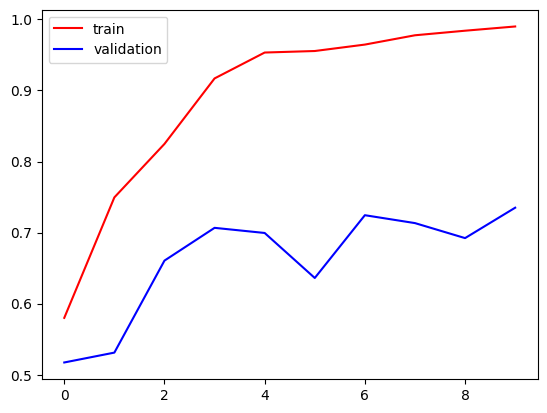

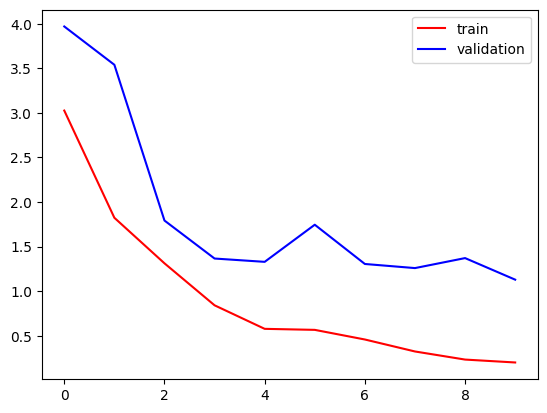

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# Check MOdel Prediction

In [8]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [7]:
model_path = "/content/drive/MyDrive/Deep Learning/Emotion detection System/ResNet50_Transfer_Learning/ResNet50_69_Transfer_Learning.h5"

model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [8]:
from PIL import Image
image = Image.open("/content/drive/MyDrive/Deep Learning/Emotion detection System/image/srv.jpeg")

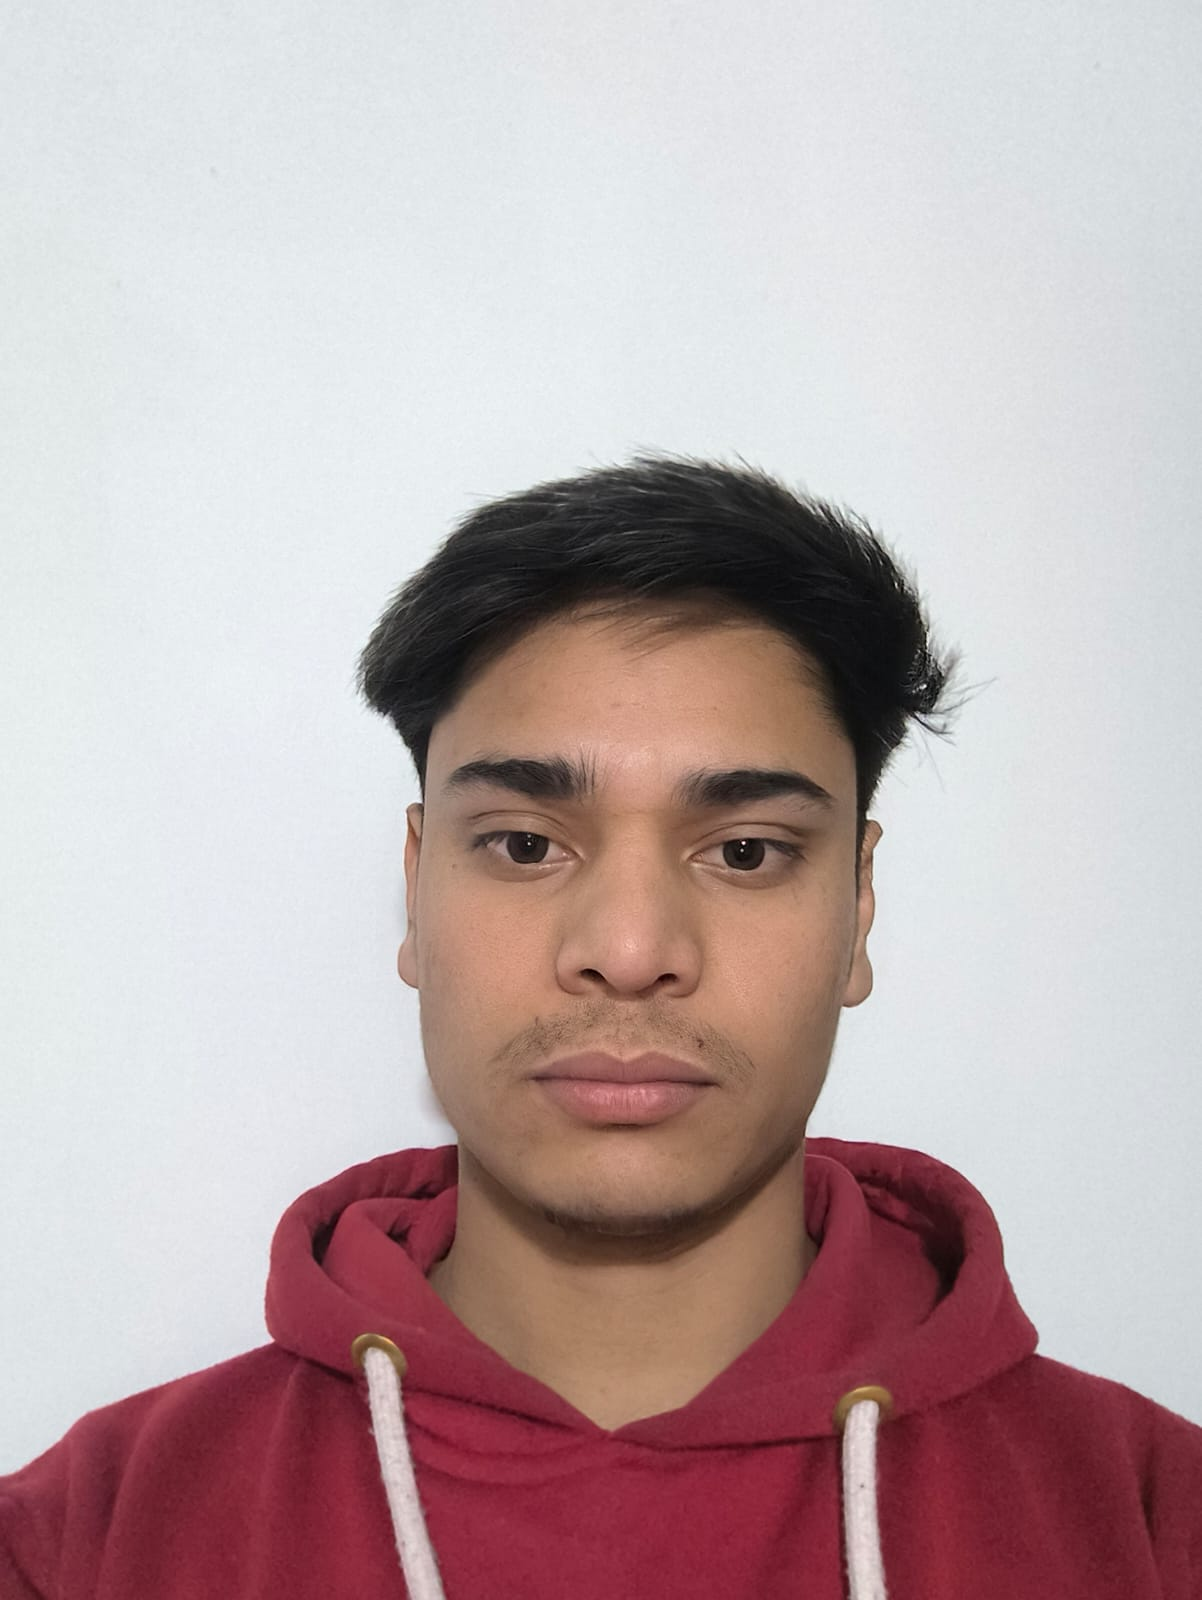

In [9]:
image

In [10]:
import numpy as np
def preprocess_image(image):
    image = image.resize((224, 224))
    image_array = np.array(image)
    image_array = image_array / 255.0
    test_input = np.expand_dims(image_array, axis=0)
    return test_input
test_image = preprocess_image(image)
prediction_array = model.predict(test_image)
emotion_dict = {
            0: "Angry",
            1: "Happy",
            2: "Neutral",
            3: "Sad",
            4: "Surprise"
        }
flag = np.argmax(prediction_array)
print(emotion_dict[flag])

1/1 [==============================] - 1s 1s/step
Neutral


In [11]:
prediction_array

array([[0.03732675, 0.05914972, 0.57078314, 0.2685206 , 0.06421984]],
      dtype=float32)